# 산점도
- 변수간 관계 포착을 직관적으로 전달

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.mplot3d import Axes3D

In [3]:
landtemps = pd.read_csv('data/landtemps2019avgs.csv')

### 평균 기온별 위도(latabs)의 산점도

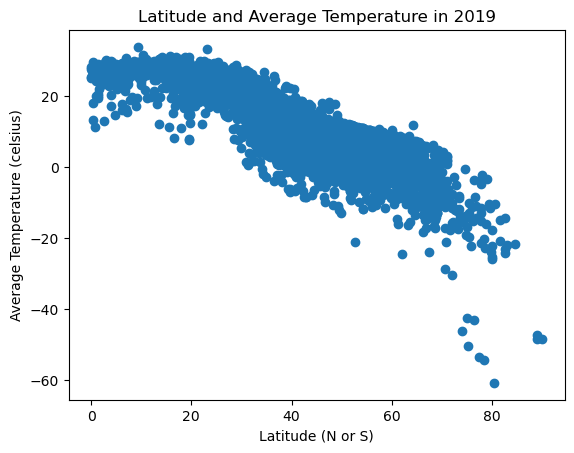

In [7]:
plt.scatter(x='latabs', y='avgtemp', data=landtemps)
plt.xlabel('Latitude (N or S)')
plt.ylabel('Average Temperature (celsius)')
plt.title('Latitude and Average Temperature in 2019')
plt.show()

### 고지대를 빨간색으로 표시

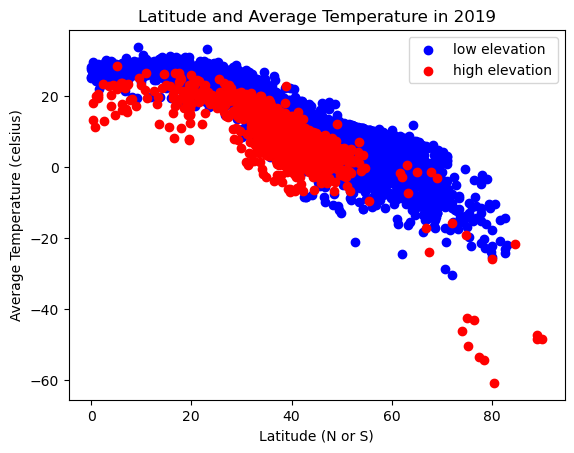

In [13]:
low, high = landtemps.loc[landtemps.elevation <=1000], landtemps.loc[landtemps.elevation >1000]
plt.scatter(x='latabs', y='avgtemp', c='blue', data=low)
plt.scatter(x='latabs', y='avgtemp', c='red', data=high)
plt.legend(('low elevation', 'high elevation'))
plt.xlabel('Latitude (N or S)')
plt.ylabel('Average Temperature (celsius)')
plt.title('Latitude and Average Temperature in 2019')
plt.show()

### 고도, 위도, 기온의 3차원 산점도
- 고도가 높은 관측소의 위도가 증가함에 따라 온도가 가파르게 감소하는 것으로 보임

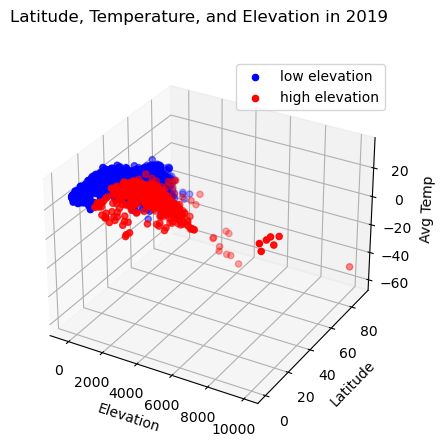

In [24]:
fig = plt.figure()
plt.suptitle('Latitude, Temperature, and Elevation in 2019')

ax = plt.axes(projection='3d')
# ax.set_title('Three D')

ax.set_xlabel('Elevation')
ax.set_ylabel('Latitude')
ax.set_zlabel('Avg Temp')
ax.scatter3D(low.elevation, low.latabs, low.avgtemp, label='low elevation', c='blue')
ax.scatter3D(high.elevation, high.latabs, high.avgtemp, label='high elevation', c='red')
ax.legend()
plt.show()

### 위도와 기온 데이터의 회귀직선
- regplot으로 회귀직선 그림

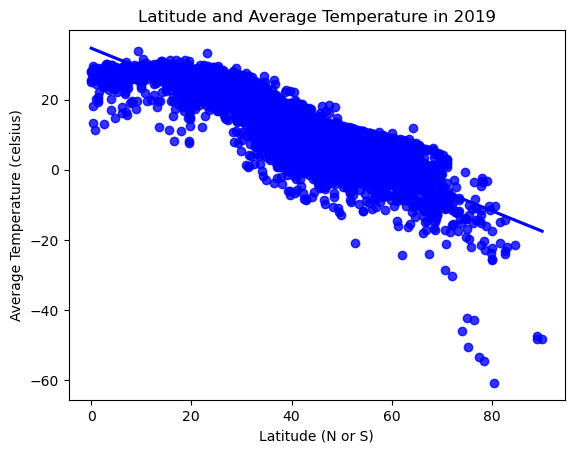

In [25]:
sns.regplot(x='latabs', y='avgtemp', color='blue', data=landtemps)
plt.title('Latitude and Average Temperature in 2019')
plt.xlabel('Latitude (N or S)')
plt.ylabel('Average Temperature (celsius)')
plt.show()

### 저지대 및 고지대에 위치한 관측소의 회귀직선을 따로 그리기
- lmplot 사용 : regplot 메서드와 기능은 비슷